In [1]:
import glob
import math
import os
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.measure as ski
import re

from pathlib import Path
cur_dir = Path().resolve()
sys.path.append(str(cur_dir) + "/module")

Max Gradient Position (row, column): (296, 0)


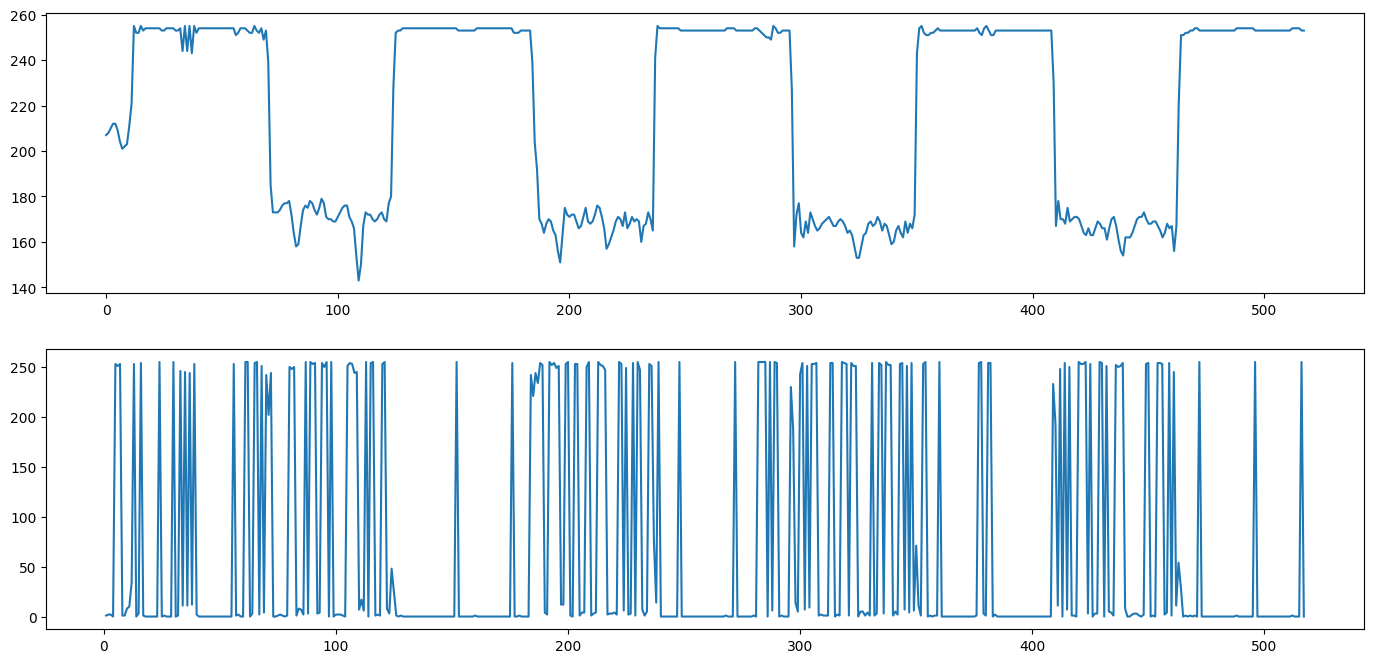

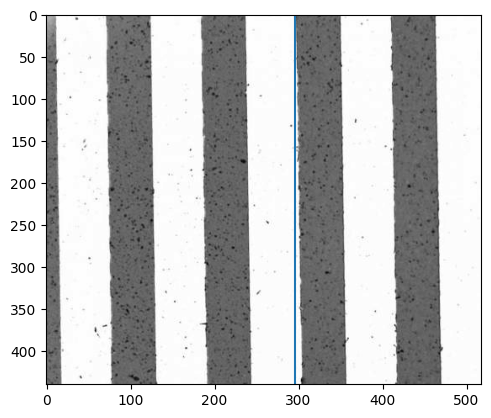

In [12]:
img = cv2.imread('../../image/sample_ls.png', cv2.IMREAD_ANYDEPTH)
diff = np.diff(img[0]).astype(np.int16)
fig, ax = plt.subplots(2, 1, figsize=(17, 8))
ax[0].plot([i for i in range(len(img[0]))], img[0])
ax[1].plot([i for i in range(1,len(img[0]-1))], diff)
# Sobelフィルタを用いて勾配を計算
gradient_x = cv2.Sobel(img[0], cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(img[0], cv2.CV_64F, 0, 1, ksize=3)

# 勾配の大きさを計算
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# 勾配が最大となる位置を求める
max_gradient_position = np.unravel_index(np.argmax(gradient_magnitude), gradient_magnitude.shape)

print("Max Gradient Position (row, column):", max_gradient_position)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.axvline(x=max_gradient_position[0])

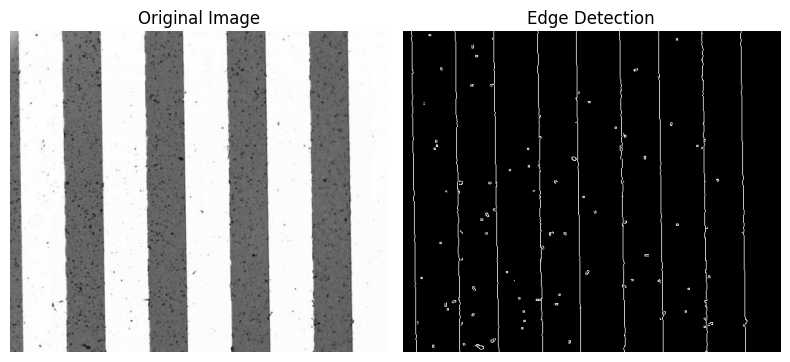

In [13]:
# Cannyエッジ検出を適用
edges = cv2.Canny(img, threshold1=100, threshold2=200)  # 適切なしきい値を設定

# エッジを描画して表示
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()